<a href="https://colab.research.google.com/github/Jegovila/tallerCV/blob/main/TallerCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Taller introducción a visión por computadora con OpenCV**

Dr. Javier Gómez

# Preparar el entorno

Instalar paquetes

In [ ]:
pip install opencv-python

In [ ]:
pip install mediapipe

Importar imágenes

In [ ]:
!wget "https://github.com/Jegovila/tallerCV/raw/main/dataset.zip"

In [ ]:
!unzip dataset.zip

Importar paquetes

In [13]:
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import numpy as np
import mediapipe as mp

# Procesamiento de la imagen

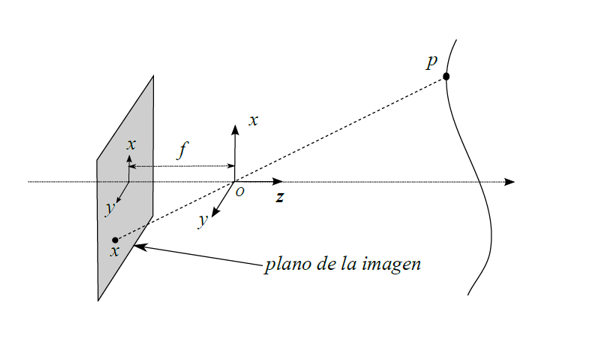

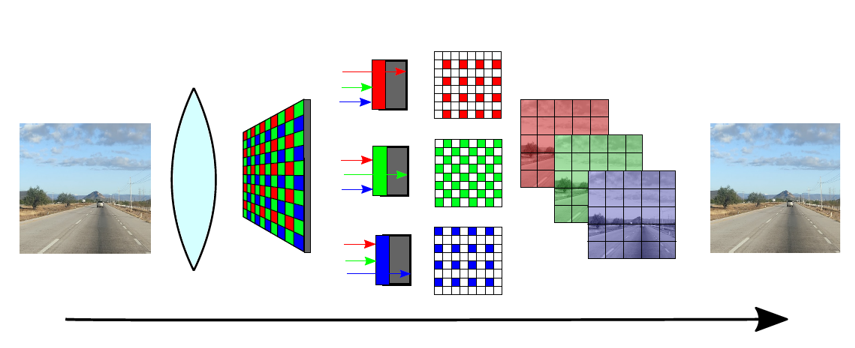

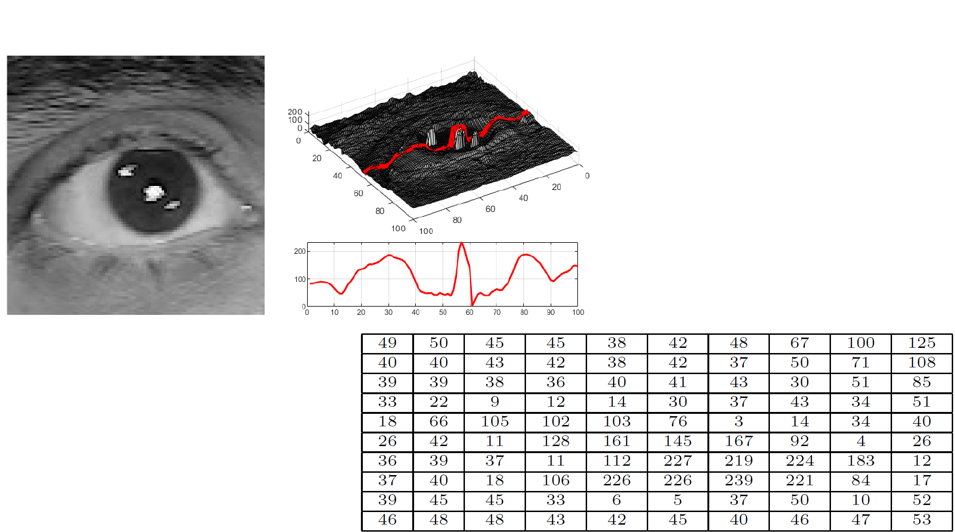

Leer imagen

In [ ]:
I = cv2.imread('./dataset/lena.png')
cv2_imshow(I)

**Acceder a los valores de pixel**

Recordar que OpenCV maneja el formato BGR por defecto


In [ ]:
fila = 10
columna = 20
print(I[fila, columna])

Modificar el valor de un conjunto de píxeles

In [ ]:
Im = cv2.imread('./dataset/lena.png')
Im[100:200,:100,0] = 255
cv2_imshow(Im)

**Desplegar los 3 canales de color por separado**

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20,14))
fig.tight_layout()

plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.subplot(1,4,2)
plt.imshow(I[:,:,0], cmap='gray')
plt.title('B')
plt.subplot(1,4,3)
plt.imshow(I[:,:,1], cmap='gray')
plt.title('G')
plt.subplot(1,4,4)
plt.imshow(I[:,:,2], cmap='gray')
plt.title('R')

**Convertir espacios de color**

In [ ]:
Ig = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1, 2, figsize=(20,14))
fig.tight_layout()

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(Ig, cmap='gray')

**Modificar el tamaño de la imagen**

In [ ]:
print("Resolución original: ", Ig.shape)

new_width = 100;
new_height = 100;

resized = cv2.resize(Ig, (new_width, new_height), interpolation= cv2.INTER_LINEAR)
print("Nueva resolución: ", resized.shape)

cv2_imshow(Ig)
cv2_imshow(resized)

# Filtrado de la Imagen

Ciertos efectos no pueden lograrse si no se considera un vecindario.
Los filtros son operaciones en donde el nuevo píxel depende de un conjunto de píxeles de la imagen original.

La convolución es la representación más general del filtrado de señales. Se trata de un operador matemático que transforma dos funciones $x(t)$ y $g(t)$ y cuyo resultado es una nueva señal que representa cuánto se superponen.

En una dimensión está representada por:

\begin{equation}
y(t) = \int_{-\infty }^{\infty}g(t- \tau)x(\tau)d\tau
\end{equation}

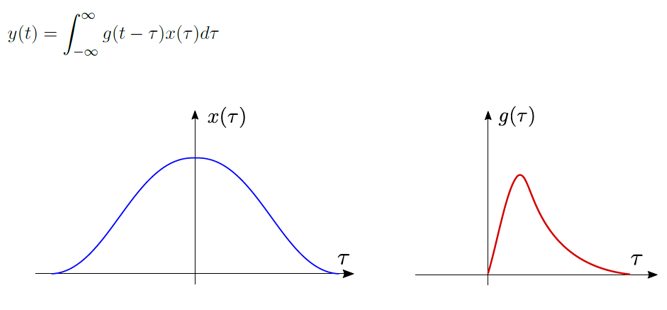

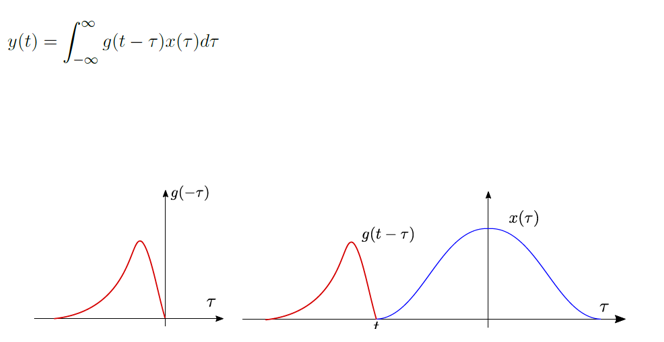

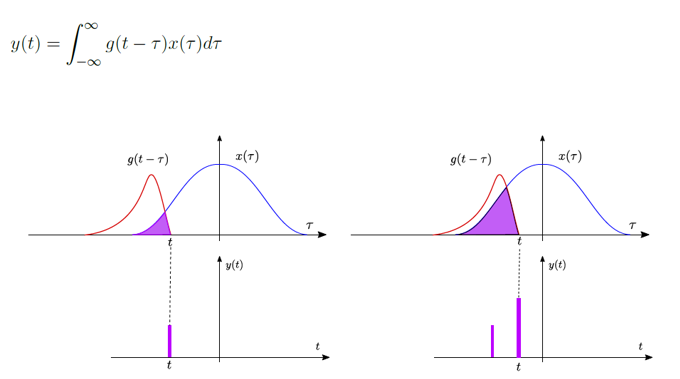

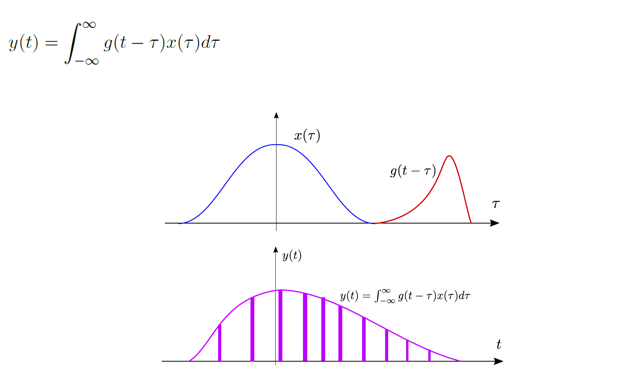

El kernel depende del efecto deseado.

Para dos funciones (imágenes discretas) $I$ y $H$ la convolución lineal se define como:

\begin{equation}
I'(x,y) = \sum_{i=-\infty}^{\infty}\sum_{j=-\infty}^{\infty} I(x-i,y-j)\cdot H(i,j) = I\ast H
\end{equation}

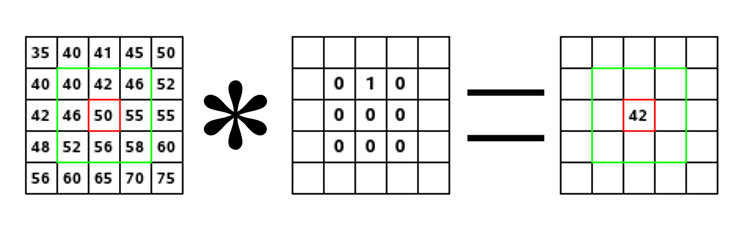

** Suavizado **
Es común encontrar cambios abrptos en la imagen (alos cambios de intensidad de un píxel a otro). No siempre esta condición representa una entidad importante sino ruido. 

Una primera idea de filtrar este ruido implica reemplazar el valor de un píxel por el promedio de sus vecinos.

\begin{equation}
I'(x,y) = \frac{p_1+p_2+...+p_n}{n}
\end{equation}

Suavizado de la imagen con filtro Box


In [ ]:
n = 3
h = np.ones((n,n),np.float32)/(n*n)

dst = cv2.filter2D(Ig,-1,h)

fig, ax = plt.subplots(1, 2, figsize=(20,14))
fig.tight_layout()

plt.subplot(1,2,1)
plt.imshow(Ig, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(dst, cmap='gray')

**Detección de bordes**

La detección de bordes se logra calculando la diferencia de intensidad entre el píxel siguiente y el píxel anterior. 

La diferencia debe calcularse en dirección horizontal y vertical de la imagen y puede hacerse con el siguiente filtro (Sobel).

\begin{equation}
H_{x}^{S}=\begin{bmatrix}
-1 & 0 & 1 \\ 
-2 & 0 & 2\\ 
-1 & 0 & 1 
\end{bmatrix}
\end{equation}

\begin{equation}
H_{y}^{S}=\begin{bmatrix}
-1 & -2 & 1 \\ 
0 & 0 & 0\\ 
1 & 2 & 1 
\end{bmatrix}
\end{equation}

In [ ]:
sobelx = cv2.Sobel(src=Ig, ddepth=-1, dx=1, dy=0, ksize=5)
sobely = cv2.Sobel(src=Ig, ddepth=-1, dx=0, dy=1, ksize=5)
sobelxy = cv2.Sobel(src=Ig, ddepth=-1, dx=1, dy=1, ksize=5)

# Desplegar resultados
fig, ax = plt.subplots(1, 4, figsize=(20,14))
fig.tight_layout()

plt.subplot(1,4,1)
plt.imshow(Ig, cmap='gray')
plt.title('Original')
plt.subplot(1,4,2)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel x')
plt.subplot(1,4,3)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel y')
plt.subplot(1,4,4)
plt.imshow(sobelxy, cmap='gray')
plt.title('Sobel xy')

Binarizar la imagen de salida

In [ ]:
# Aplicar Umbral
ret, binaria = cv2.threshold(sobelxy,127,255,cv2.THRESH_BINARY)
cv2_imshow(binaria)

Comparar detección de bordes con imagen original e imagen suavizada

In [ ]:
n = 3
h = np.ones((n,n),np.float32)/(n*n)
dst = cv2.filter2D(Ig,-1,h)

sobelxy_original = cv2.Sobel(src=Ig, ddepth=-1, dx=1, dy=1, ksize=5) # Original
sobelxy_suavizada = cv2.Sobel(src=dst, ddepth=-1, dx=1, dy=1, ksize=5) # Suavizada

ret_o, binaria_o = cv2.threshold(sobelxy_original,127,255,cv2.THRESH_BINARY)
ret_s, binaria_s = cv2.threshold(sobelxy_suavizada,127,255,cv2.THRESH_BINARY)


fig, ax = plt.subplots(1, 2, figsize=(20,14))
fig.tight_layout()

plt.subplot(1,2,1)
plt.imshow(binaria_o, cmap='gray')
plt.title('Sin suavizar')
plt.subplot(1,2,2)
plt.imshow(binaria_s, cmap='gray')
plt.title('Suavizada con box')

# Detección de esquinas

1. Calcular las derivadas en ambas direcciones
\begin{equation}
I_x = I \ast h_x \qquad I_y = I \ast h_y
\end{equation}

2. Aproximar las segundas derivadas
\begin{equation}
I_{xx} = I_x \cdot I_x \qquad I_{xy} = I_x \cdot I_y \qquad I_{yy}=I_y \cdot I_y
\end{equation}

3. Aplicar suavizado y armar la matriz Hessiana
\begin{equation}
H(x,y) = \begin{bmatrix}
I_{xx}\ast G & I_{xy}\ast G\\ 
I_{xy}\ast G & I_{yy}\ast G 
\end{bmatrix}
\end{equation}

4. Calcular la respuesta del detector en cada píxel
\begin{equation}
R = det(H)-k(trace(H))^2
\end{equation}

5. Umbral y supresión no máxima

In [ ]:
I = cv2.imread('./dataset/chess.jpg')
Ig = cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)

corners = cv2.cornerHarris(Ig,2,3,0.04)
corners = cv2.dilate(corners,None) # Para visualizar mejor las esquinas

I[corners > 0.01 * corners.max()]=[0, 0, 255]
cv2_imshow(I)

Si queremos saber su ubicación:

In [ ]:
corners = cv2.cornerHarris(Ig,2,3,0.04)
ret, corners = cv2.threshold(corners,0.1*corners.max(),255,0)
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(corners.astype(np.uint8))
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(Ig,np.float32(centroids),(5,5),(-1,-1),criteria)

for i in range(len(corners[:10])):
    print(corners[i])

Graficar las esquinas

In [ ]:
for i in range(len(corners[:])):
    plt.scatter(corners[i,0],-corners[i,1])

# Descriptores

1. Construir espacio de escalas

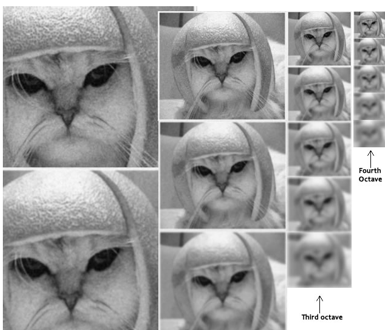

2. Aproximación LoG

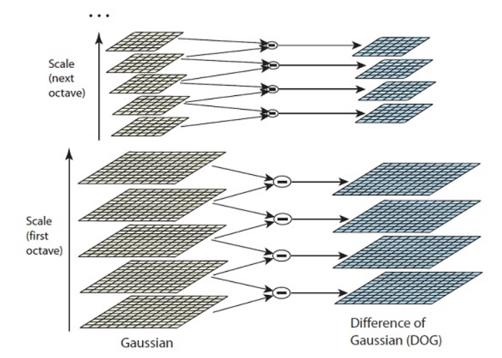

3. Encontrar puntos de interés

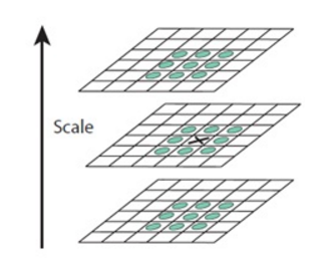

4. Eliminar malos puntos de interés

5. Orientación de los puntos de interés

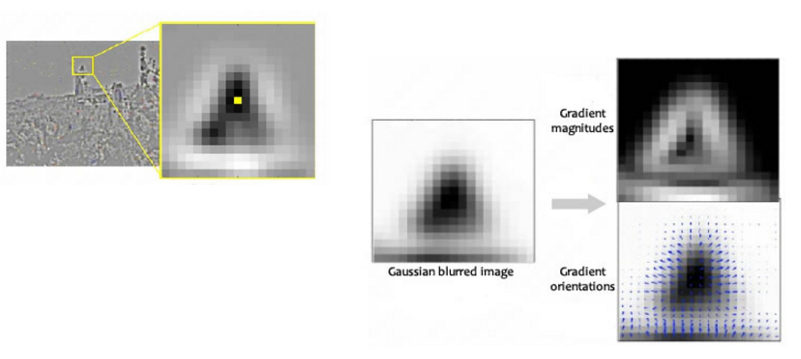

6. Generar el descriptor

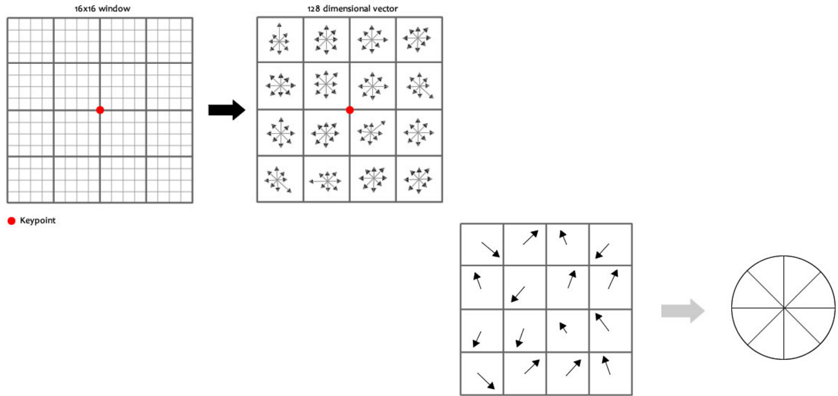

Primero leemos la imagen y la transformamos

In [ ]:
I = cv2.imread('./dataset/lena.png')
rows,cols,ch = I.shape

(h, w) = I.shape[:2]
M = cv2.getRotationMatrix2D((w//2, h//2), 45, .7) # centro de rotación, angulo, escala
I2 = cv2.warpAffine(I, M, (w, h))

#I = cv2.imread('./dataset/I1.jpg')
#I2 = cv2.imread('./dataset/I2.jpg')

fig, ax = plt.subplots(1, 2, figsize=(20,14))
fig.tight_layout()

plt.subplot(121),plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB)),plt.title('Input')
plt.subplot(122),plt.imshow(cv2.cvtColor(I2, cv2.COLOR_BGR2RGB)),plt.title('Output')
plt.show()

**AKAZE**

Primero detectar keypoints

In [ ]:
gray1 = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(I2, cv2.COLOR_BGR2GRAY)

detector = cv2.AKAZE_create()
(kps1, descs1) = detector.detectAndCompute(gray1, None)
(kps2, descs2) = detector.detectAndCompute(gray2, None)

print("keypoints: {}, descriptors: {}".format(len(kps1), descs1.shape))
print("keypoints: {}, descriptors: {}".format(len(kps2), descs2.shape))  

Calcular las correspondencias entre puntos

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.match(descs1,descs2) 

# Ordenar las correspondencias
matches = sorted(matches, key = lambda x:x.distance)

print("Ejemplo de 1 match:")
print("Match 0 en I1 corresponde al Keypoint: ", matches[0].queryIdx, "con coordenadas: ", kps1[matches[0].queryIdx].pt)
print("Match 0 en I2 corresponde al Keypoint: ", matches[0].trainIdx, "con coordenadas: ", kps2[matches[0].trainIdx].pt)

# Mostrar las mejores 10
I3 = cv2.drawMatches(I, kps1, I2, kps2, matches[:10], None, flags=2)
cv2_imshow(I3)

**Imágenes panoramicas**

Primero encontrar la transformación entre las dos imágenes y aplicarla a la segunda imagen.

In [ ]:
left_pts = []
right_pts = []
for m in matches[:20]:
    l = kps1[m.queryIdx].pt
    r = kps2[m.trainIdx].pt
    left_pts.append(l)
    right_pts.append(r)
  
M, _ = cv2.findHomography(np.float32(right_pts), np.float32(left_pts))

dim_x = int(I2.shape[0]*M[0,0]+M[1,2])
dim_y = max(I.shape[0], int(I2.shape[1]*M[0,0]+M[0,2]))
dim = (dim_x, dim_y)

warped = cv2.warpPerspective(I2, M, dim)

cv2_imshow(warped)

Pegar ambas imágenes

In [ ]:
comb = warped.copy()
# combinar las imágenes
comb[0:I.shape[0],0:I.shape[1]] = I
comb = comb[:int(I2.shape[0]*M[0,0]+M[1,2]), :int(I2.shape[1]*M[0,0]+M[0,2])]
cv2_imshow(comb)

# Visión estéreo

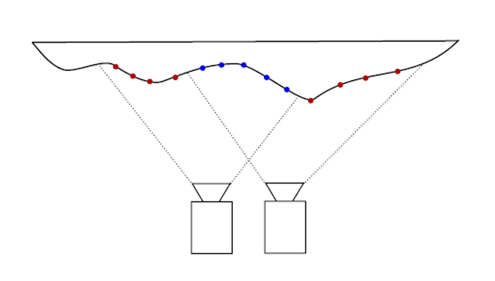

.

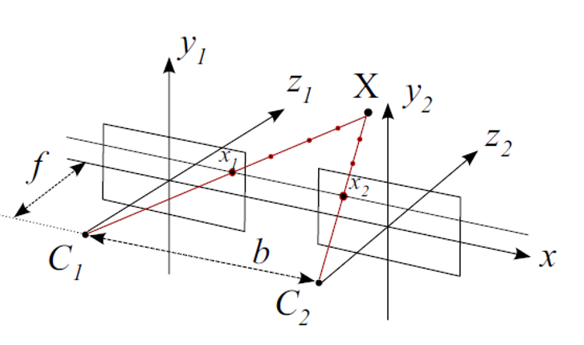

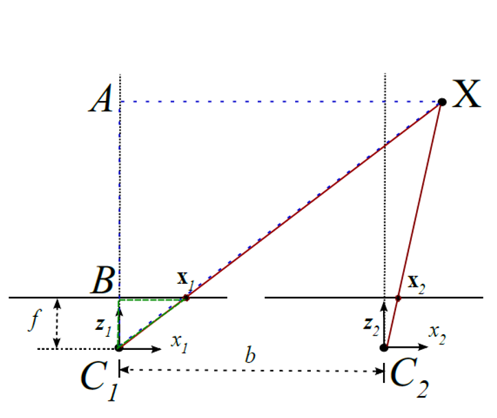

\begin{equation}
x_1 =f \frac{X_1}{Z_1} \qquad x_2 =f \frac{X_2}{Z_2}
\end{equation}

\begin{equation}
x_1 =f \frac{(X_2 + b)-X_2}{Z_1}
\end{equation}

\begin{equation}
d = x_1 - x_2 = f \frac{(X_2 + b)-X_2}{Z_1} = f \frac{b}{Z}
\end{equation}

\begin{equation}
Z = f \frac{b}{d}
\end{equation}


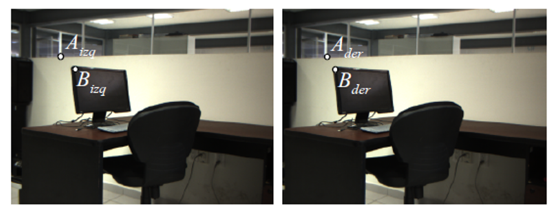

** Incertidumbre en la medición de la profundidad **

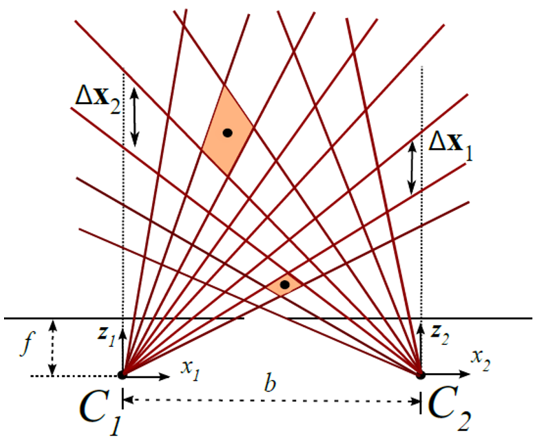

In [ ]:
imgL = cv2.imread('./dataset/imL.png', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('./dataset/imR.png', cv2.IMREAD_GRAYSCALE)
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)

fig, ax = plt.subplots(1, 3, figsize=(20,14))
fig.tight_layout()

plt.subplot(1,3,1)
plt.imshow(imgL, cmap='gray')
plt.title('Left')
plt.subplot(1,3,2)
plt.imshow(imgR, cmap='gray')
plt.title('Right')
plt.subplot(1,3,3)
plt.imshow(disparity, cmap='gray')
plt.title('disparity')

plt.imshow(disparity,'gray')
plt.show()

# Mediapipe

Detección de rostros


In [ ]:
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

with mp_face_detection.FaceDetection(
    model_selection=1, min_detection_confidence=0.5) as face_detection:

    image = cv2.imread('./dataset/lena.png')
    # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face detections of each face.
    annotated_image = image.copy()
    for detection in results.detections:
      print('Nose tip:')
      print(mp_face_detection.get_key_point(
          detection, mp_face_detection.FaceKeyPoint.NOSE_TIP))
      mp_drawing.draw_detection(annotated_image, detection)
    cv2_imshow(annotated_image)